In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("C:\\multi_final\\data_2023_01_3.csv", encoding='cp949')

# 필요한 칼럼만 추출
df = df[['ID', 'date', 'hour', 'count']]
df

,ID,date,hour,count
0,1124,2023-01-01,0,15
1,1124,2023-01-01,1,13
2,1124,2023-01-01,2,12
3,1124,2023-01-01,3,16
4,1124,2023-01-01,4,15
...,...,...,...,...
7435,3798,2023-01-31,19,18
7436,3798,2023-01-31,20,20
7437,3798,2023-01-31,21,22
7438,3798,2023-01-31,22,26


In [7]:
# 정류소(ID)별로 데이터를 그룹화
grouped = df.groupby('ID')

# 각 정류소(ID)별 데이터 확인 (예시로 첫
#  번째 그룹의 데이터를 확인)
for name, group in grouped:
    print(f"정류소 ID: {name}")
    print(group, "\n")

정류소 ID: 1124
        ID        date  hour  count
0     1124  2023-01-01     0     15
1     1124  2023-01-01     1     13
2     1124  2023-01-01     2     12
3     1124  2023-01-01     3     16
4     1124  2023-01-01     4     15
...    ...         ...   ...    ...
2179  1124  2023-01-31    19     15
2180  1124  2023-01-31    20     16
2181  1124  2023-01-31    21      7
2182  1124  2023-01-31    22      5
2183  1124  2023-01-31    23      2

[744 rows x 4 columns] 

정류소 ID: 1153
        ID        date  hour  count
24    1153  2023-01-01     0     32
25    1153  2023-01-01     1     26
26    1153  2023-01-01     2     20
27    1153  2023-01-01     3     15
28    1153  2023-01-01     4     10
...    ...         ...   ...    ...
2203  1153  2023-01-31    19     29
2204  1153  2023-01-31    20     24
2205  1153  2023-01-31    21     20
2206  1153  2023-01-31    22      4
2207  1153  2023-01-31    23      0

[744 rows x 4 columns] 

정류소 ID: 1158
        ID        date  hour  count
48    115

In [8]:
# 'date'와 'hour' 칼럼을 합쳐서 새로운 'datetime' 칼럼 생성
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# 이제 'datetime'과 'ID'를 기준으로 정렬합니다.
df.sort_values(by=['ID', 'datetime'], inplace=True)


In [9]:
from sklearn.preprocessing import MinMaxScaler

# 정규화를 위한 스케일러 초기화
scaler = MinMaxScaler()

# 'count' 칼럼에 대해서만 스케일링 수행
df['count_scaled'] = scaler.fit_transform(df['count'].values.reshape(-1,1))

# 결과 확인
print(df.head())

     ID        date  hour  count            datetime  count_scaled
0  1124  2023-01-01     0     15 2023-01-01 00:00:00      0.185185
1  1124  2023-01-01     1     13 2023-01-01 01:00:00      0.160494
2  1124  2023-01-01     2     12 2023-01-01 02:00:00      0.148148
3  1124  2023-01-01     3     16 2023-01-01 03:00:00      0.197531
4  1124  2023-01-01     4     15 2023-01-01 04:00:00      0.185185


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [11]:
# 시퀀스 데이터로 변환하는 함수
def create_dataset(X, y, look_back=1):
    Xs, ys = [], []
    for i in range(len(X) - look_back):
        v = X.iloc[i:(i + look_back)].values
        Xs.append(v)
        ys.append(y.iloc[i + look_back])
    return np.array(Xs), np.array(ys)

look_back = 3  # 과거 3개의 시간 단계를 사용하여 다음 단계를 예측


In [16]:
# # 정류소별로 모델 학습
# unique_stops = df['ID'].unique()

# for stop in unique_stops:
#     stop_data = df[df['ID'] == stop]
    
#     # 'datetime' 칼럼은 LSTM 모델 입력으로 사용하지 않으므로 제외
#     X = stop_data[['hour', 'count_scaled']]  # 입력 변수
#     y = stop_data['count_scaled']  # 예측할 변수
    
#     # 시퀀스 데이터 생성
#     X_seq, y_seq = create_dataset(X, y, look_back)
    
#     # 학습 및 테스트 데이터 분할
#     X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
#     # LSTM 모델 구성
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(look_back, X_train.shape[2])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
    
#     # 모델 학습
#     model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)
    
#     # 여기서는 각 정류소별 모델의 성능을 평가하거나 저장하는 코드는 생략하였습니다.
#     # 필요에 따라 각 정류소별 모델의 성능을 평가하고, 모델을 저장할 수 있습니다.


Epoch 1/20


c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 4s - 8ms/step - loss: 0.1234 - val_loss: 0.0116
Epoch 2/20
473/473 - 1s - 3ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 4/20
473/473 - 1s - 3ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0041 - val_loss: 0.0118
Epoch 6/20
473/473 - 2s - 3ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 7/20
473/473 - 1s - 3ms/step - loss: 0.0038 - val_loss: 0.0099
Epoch 8/20
473/473 - 1s - 3ms/step - loss: 0.0062 - val_loss: 0.0039
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0031 - val_loss: 0.0204
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 13/20
473/473 - 1s - 3ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 14/20
473/473 - 1s - 3ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 15/20
473/473 - 1s - 2ms/step - lo

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 4s - 8ms/step - loss: 0.0233 - val_loss: 0.0064
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0101 - val_loss: 0.0049
Epoch 3/20
473/473 - 1s - 3ms/step - loss: 0.0099 - val_loss: 0.0080
Epoch 4/20
473/473 - 1s - 3ms/step - loss: 0.0094 - val_loss: 0.0043
Epoch 5/20
473/473 - 1s - 3ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 6/20
473/473 - 1s - 2ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0062 - val_loss: 0.0036
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0054 - val_loss: 0.0092
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 13/20
473/473 - 1s - 3ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 14/20
473/473 - 1s - 2ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 15/20
473/473 - 1s - 2ms/step - lo

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 3s - 7ms/step - loss: 0.0083 - val_loss: 0.0026
Epoch 2/20
473/473 - 1s - 3ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 4/20
473/473 - 1s - 2ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0024 - val_loss: 8.8968e-04
Epoch 6/20
473/473 - 1s - 2ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 10/20
473/473 - 2s - 4ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/20
473/473 - 1s - 3ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 12/20
473/473 - 2s - 4ms/step - loss: 0.0018 - val_loss: 7.9599e-04
Epoch 13/20
473/473 - 2s - 3ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 14/20
473/473 - 2s - 4ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 15/20
473/473 - 2s - 5ms/s

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 3s - 6ms/step - loss: 0.0199 - val_loss: 0.0071
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0029 - val_loss: 0.0087
Epoch 4/20
473/473 - 1s - 2ms/step - loss: 0.0038 - val_loss: 0.0054
Epoch 5/20
473/473 - 1s - 1ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 6/20
473/473 - 1s - 1ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 10/20
473/473 - 1s - 3ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 12/20
473/473 - 1s - 3ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 13/20
473/473 - 1s - 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 14/20
473/473 - 1s - 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 15/20
473/473 - 3s - 6ms/step - lo

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 5s - 11ms/step - loss: 0.0134 - val_loss: 0.0072
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 3/20
473/473 - 1s - 1ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 4/20
473/473 - 1s - 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 5/20
473/473 - 1s - 1ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 6/20
473/473 - 1s - 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7/20
473/473 - 1s - 1ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 12/20
473/473 - 1s - 3ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 13/20
473/473 - 1s - 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 14/20
473/473 - 1s - 1ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 15/20
473/473 - 1s - 1ms/step - l

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 3s - 7ms/step - loss: 0.0234 - val_loss: 0.0112
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0096 - val_loss: 0.0123
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 4/20
473/473 - 1s - 1ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 5/20
473/473 - 1s - 1ms/step - loss: 0.0068 - val_loss: 0.0095
Epoch 6/20
473/473 - 1s - 2ms/step - loss: 0.0073 - val_loss: 0.0135
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0069 - val_loss: 0.0095
Epoch 8/20
473/473 - 1s - 1ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0067 - val_loss: 0.0079
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0065 - val_loss: 0.0084
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 13/20
473/473 - 1s - 3ms/step - loss: 0.0062 - val_loss: 0.0073
Epoch 14/20
473/473 - 1s - 2ms/step - loss: 0.0060 - val_loss: 0.0071
Epoch 15/20
473/473 - 1s - 2ms/step - lo

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 5s - 10ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 2/20
473/473 - 1s - 3ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 4/20
473/473 - 1s - 2ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0066 - val_loss: 0.0046
Epoch 6/20
473/473 - 1s - 3ms/step - loss: 0.0065 - val_loss: 0.0084
Epoch 7/20
473/473 - 1s - 3ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0060 - val_loss: 0.0049
Epoch 9/20
473/473 - 1s - 3ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 13/20
473/473 - 1s - 2ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 14/20
473/473 - 1s - 3ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 15/20
473/473 - 1s - 2ms/step - l

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 3s - 7ms/step - loss: 0.0172 - val_loss: 0.0058
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 4/20
473/473 - 1s - 2ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 6/20
473/473 - 1s - 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0021 - val_loss: 9.7846e-04
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/20
473/473 - 1s - 1ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 11/20
473/473 - 1s - 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 12/20
473/473 - 1s - 1ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 13/20
473/473 - 1s - 1ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 14/20
473/473 - 1s - 1ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 15/20
473/473 - 1s - 2ms/step 

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 3s - 5ms/step - loss: 0.0674 - val_loss: 0.0169
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0245 - val_loss: 0.0147
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0188 - val_loss: 0.0126
Epoch 4/20
473/473 - 1s - 2ms/step - loss: 0.0162 - val_loss: 0.0105
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 6/20
473/473 - 1s - 3ms/step - loss: 0.0131 - val_loss: 0.0098
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0111 - val_loss: 0.0086
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0113 - val_loss: 0.0124
Epoch 9/20
473/473 - 1s - 3ms/step - loss: 0.0109 - val_loss: 0.0081
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0100 - val_loss: 0.0079
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0100 - val_loss: 0.0108
Epoch 13/20
473/473 - 1s - 2ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 14/20
473/473 - 1s - 3ms/step - loss: 0.0106 - val_loss: 0.0172
Epoch 15/20
473/473 - 1s - 2ms/step - lo

c:\Users\hyeon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


473/473 - 4s - 9ms/step - loss: 0.0729 - val_loss: 0.0075
Epoch 2/20
473/473 - 1s - 2ms/step - loss: 0.0085 - val_loss: 0.0101
Epoch 3/20
473/473 - 1s - 2ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 4/20
473/473 - 2s - 4ms/step - loss: 0.0054 - val_loss: 0.0162
Epoch 5/20
473/473 - 1s - 2ms/step - loss: 0.0055 - val_loss: 0.0068
Epoch 6/20
473/473 - 1s - 3ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/20
473/473 - 1s - 2ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 8/20
473/473 - 1s - 2ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 9/20
473/473 - 1s - 2ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 10/20
473/473 - 1s - 2ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 11/20
473/473 - 1s - 2ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 12/20
473/473 - 1s - 2ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 13/20
473/473 - 1s - 2ms/step - loss: 0.0036 - val_loss: 0.0048
Epoch 14/20
473/473 - 2s - 4ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 15/20
473/473 - 1s - 2ms/step - lo

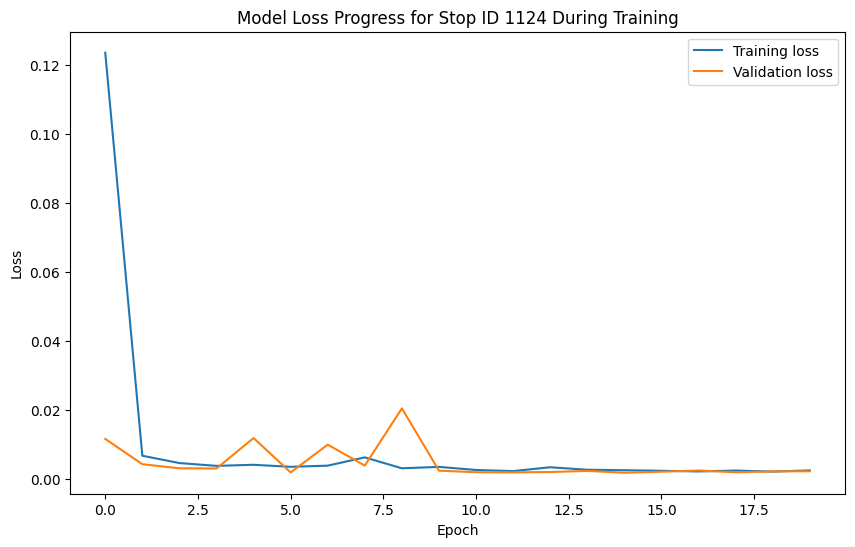

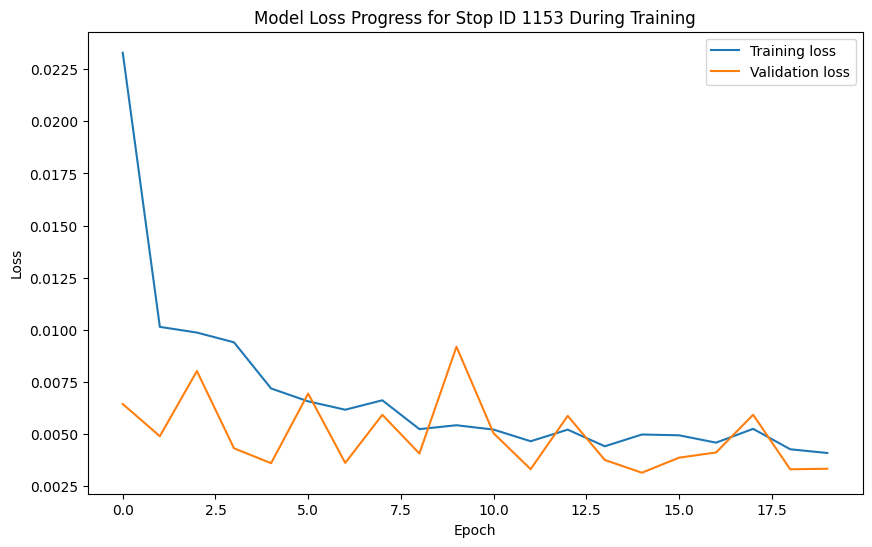

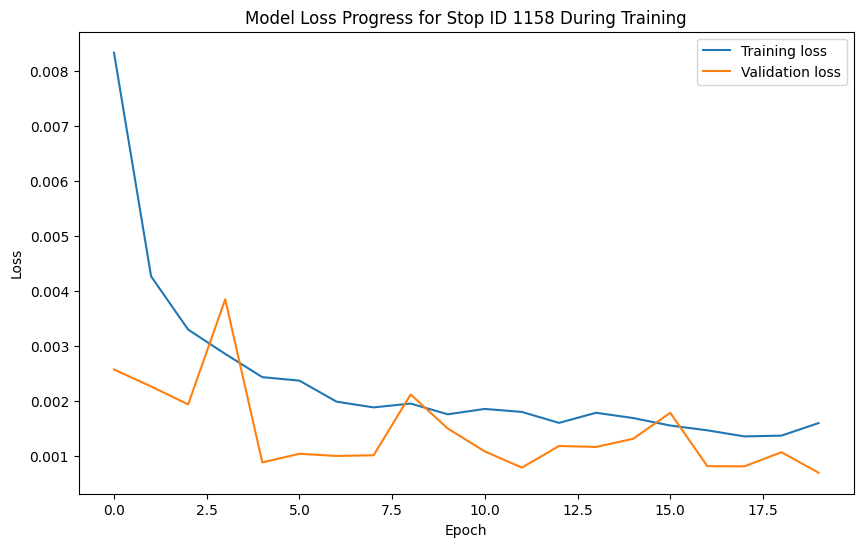

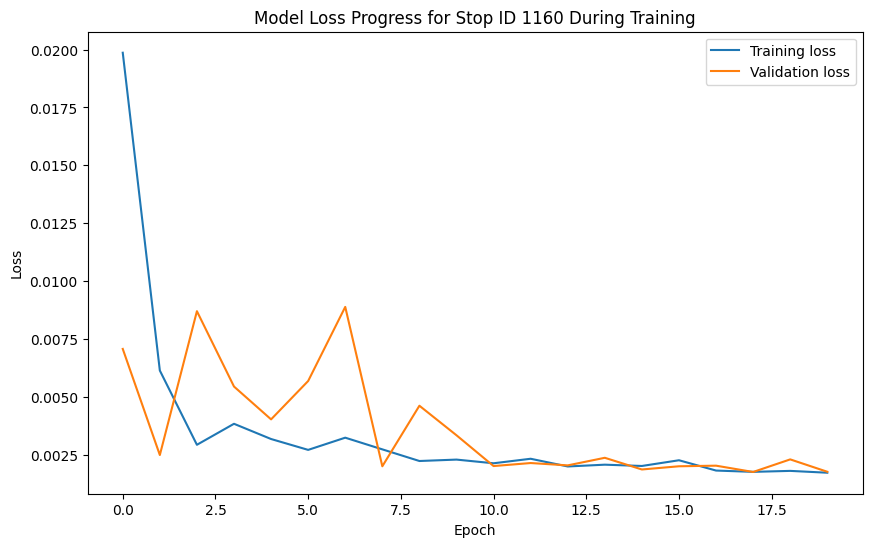

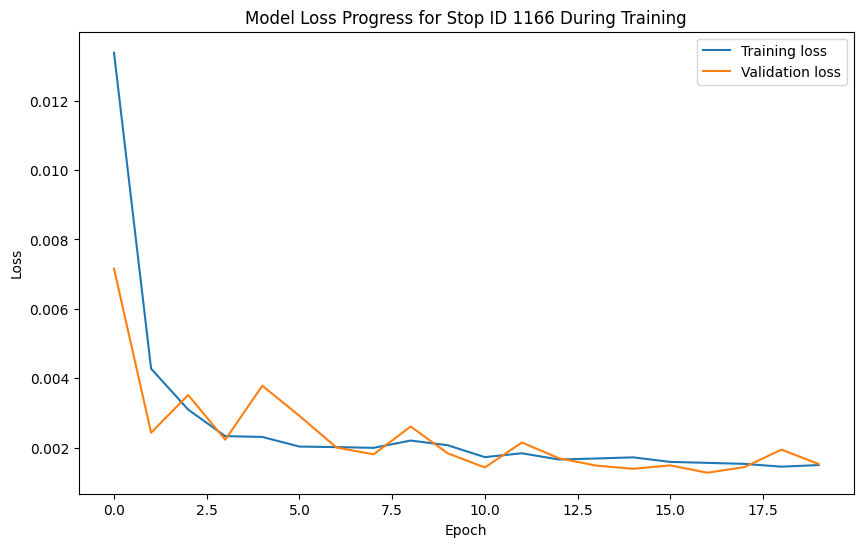

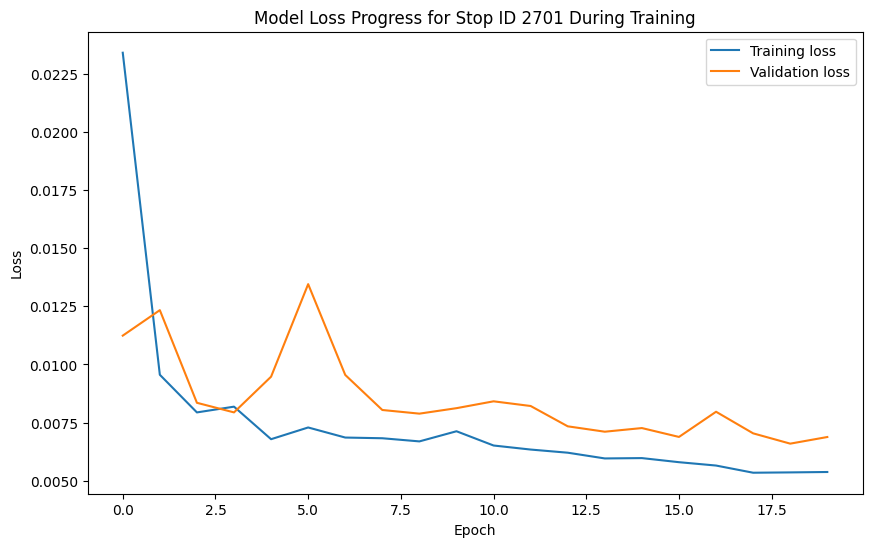

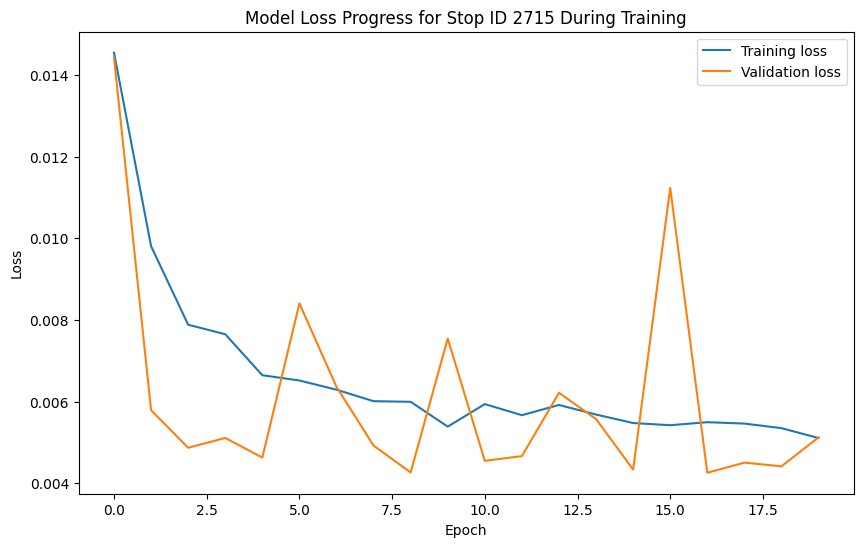

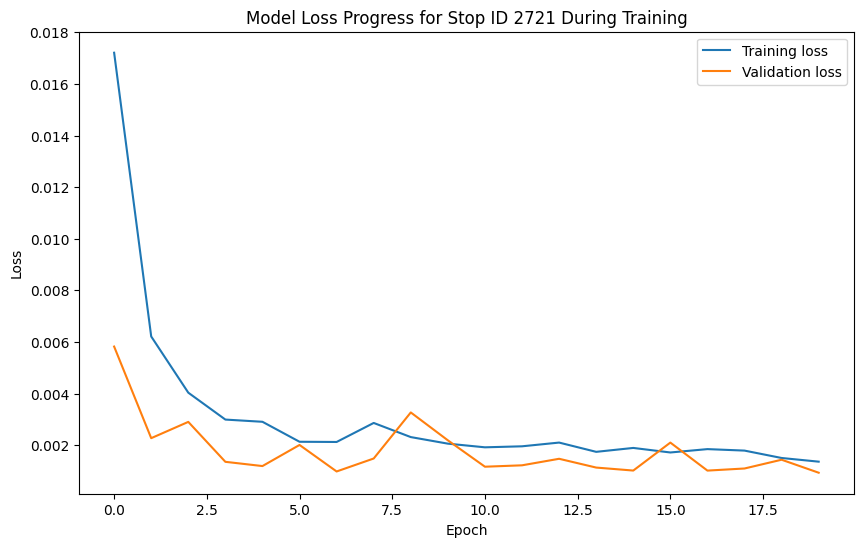

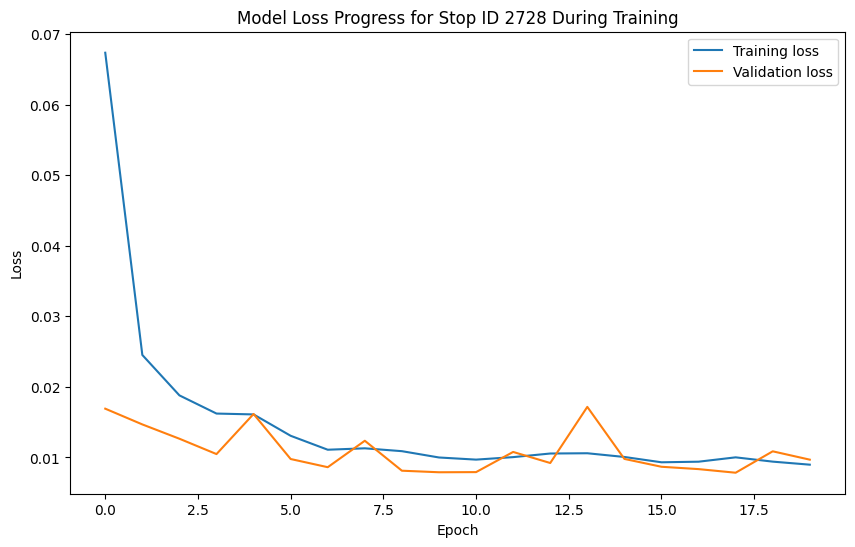

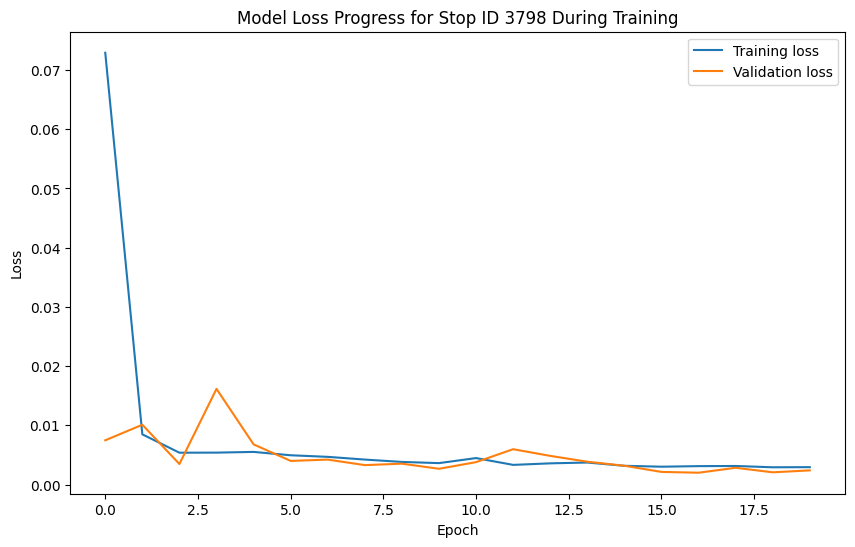

In [17]:

import matplotlib.pyplot as plt

# 정류소별로 모델 학습
unique_stops = df['ID'].unique()

# 각 정류소별로 학습 과정을 저장하기 위한 딕셔너리 초기화
history_dict = {}

for stop in unique_stops:
    stop_data = df[df['ID'] == stop]
    
    X = stop_data[['hour', 'count_scaled']]  # 입력 변수
    y = stop_data['count_scaled']  # 예측할 변수
    
    # 시퀀스 데이터 생성
    X_seq, y_seq = create_dataset(X, y, look_back)
    
    # 학습 및 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
    # LSTM 모델 구성
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # 모델 학습
    history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, validation_split=0.2)
    
    # 학습 과정 저장
    history_dict[stop] = history

# 각 정류소별 모델의 학습 과정을 그래프로 나타내기
for stop, history in history_dict.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title(f'Model Loss Progress for Stop ID {stop} During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [18]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # 모델 성능 평가를 위한 함수 정의
# def evaluate_performance(test, predicted):
#     mae = mean_absolute_error(test, predicted)
#     mse = mean_squared_error(test, predicted)
#     rmse = np.sqrt(mse)
#     print("평가 지표 결과:")
#     print(f"MAE: {mae:.4f}")
#     print(f"MSE: {mse:.4f}")
#     print(f"RMSE: {rmse:.4f}")

# # 각 정류소별 모델 성능 평가
# performance_results = {}

# for stop in unique_stops:
#     stop_data = df[df['ID'] == stop]
    
#     X = stop_data[['hour', 'count_scaled']]
#     y = stop_data['count_scaled']
    
#     X_seq, y_seq = create_dataset(X, y, look_back)
#     X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
    
#     # 이미 학습된 모델을 사용하여 테스트 데이터에 대한 예측 수행
#     y_pred = model.predict(X_test)
    
#     # 예측값을 원래 스케일로 되돌리기 위해 필요한 경우 스케일링을 역으로 적용
#     # 이 예시에서는 'count_scaled' 값에 대한 예측이므로, 스케일링 역변환 과정은 생략합니다.
    
#     # 모델 성능 평가
#     print(f"정류소 ID: {stop}")
#     evaluate_performance(y_test, y_pred)
#     performance_results[stop] = evaluate_performance(y_test, y_pred)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


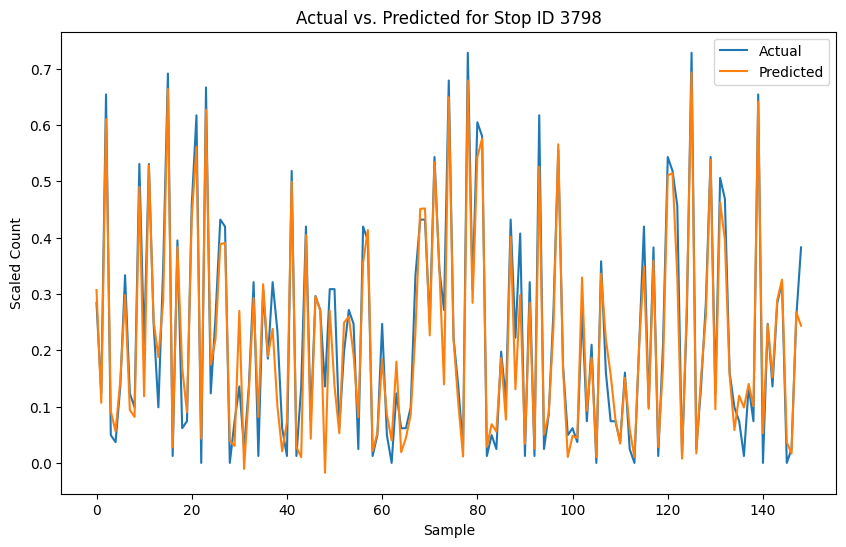

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 정류소를 선택합니다. 예를 들어, unique_stops의 첫 번째 정류소 ID를 사용합니다.
stop = unique_stops[9]

# 해당 정류소에 대한 데이터를 준비합니다.
stop_data = df[df['ID'] == stop]
X = stop_data[['hour', 'count_scaled']]
y = stop_data['count_scaled']

# 시퀀스 데이터 생성
X_seq, y_seq = create_dataset(X, y, look_back)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# 해당 정류소에 대해 이미 학습된 모델을 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 예측 값과 실제 값을 그래프로 비교합니다.
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'Actual vs. Predicted for Stop ID {stop}')
plt.xlabel('Sample')
plt.ylabel('Scaled Count')
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"모델의 결정 계수(R^2): {r2}")

모델의 결정 계수(R^2): 0.9347495604243804
